## &#x1F310; &nbsp; Code Library, Style, and Links
Useful `LINKS`:

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)

&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

In [2]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #37c9e1; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}               
</style>

In [77]:
import numpy as np 
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from descartes import PolygonPatch

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [4]:
style_dict = {'background-color':'slategray',
              'color':'#37c9e1',
              'border-color': 'white'}

## &#x1F310; &nbsp; Data

The series of notebooks `PASSNYC` 

&#x1F4D8; &nbsp;  [PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration)

&#x1F4D8; &nbsp;  [PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables)

&#x1F4D8; &nbsp;  [PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)

&#x1F4D8; &nbsp;  [PASSNYC. Regression Methods](https://www.kaggle.com/olgabelitskaya/passnyc-regression-methods)

&#x1F4D8; &nbsp;  [PASSNYC. Neural Networks](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks)

&#x1F4D8; &nbsp;  [PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2)

&#x1F4D8; &nbsp; [PASSNYC. 32 School Districts and D5. Part 2](https://lww.kaggle.com/olgabelitskaya/passnyc-32-school-districts-and-d5-part-2)

were used for exploration the following `KAGGLE` databases:

&#x1F4C2; &nbsp; [PASSNYC: Data Science for Good Challenge](https://www.kaggle.com/passnyc/data-science-for-good)

&#x1F4C2; &nbsp; [NY 2010 - 2016 School Safety Report](https://www.kaggle.com/new-york-city/ny-2010-2016-school-safety-report)

&#x1F4C2; &nbsp; [NYC High School Directory](https://www.kaggle.com/new-york-city/nyc-high-school-directory)

&#x1F4C2; &nbsp; [AP (College Board) NY School Level Results](https://www.kaggle.com/new-york-city/ap-college-board-ny-school-level-results)

&#x1F4C2; &nbsp; [New York City SAT Results](https://www.kaggle.com/new-york-city/new-york-city-sat-results)

&#x1F4C2; &nbsp; [NY School Districts](https://www.kaggle.com/olgabelitskaya/ny-school-districts)

The main goal of these notebooks is to find a way for effective visualization of public data to identify students within New York City’s under-performing school districts and methods for increasing the diversity of students taking the Specialized High School Admissions Test (SHSAT). 

It could help to improve the chances of students taking the SHSAT and receiving placements in specialized high schools.

Visualization allows different categories of people (analysts, educators, parents, students, investors) to detect the problems and find the decisions immediately in many practical cases.  

In [66]:
school_explorer = pd.read_csv('2016 School Explorer.csv')
d5_shsat = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
high_school = pd.read_csv('2016-doe-high-school-directory.csv')
safety = pd.read_csv('2010-2016-school-safety-report.csv')
sat_2010 = pd.read_csv('2010-sat-college-board-school-level-results.csv')
sat_2012 = pd.read_csv('2012-sat-results.csv')

school_explorer.shape, d5_shsat.shape, sat_2010.shape, sat_2012.shape, high_school.shape, safety.shape

((1272, 161), (140, 7), (460, 6), (478, 6), (437, 67), (6310, 34))

In [67]:
school_explorer.iloc[:3,:10].style.set_properties(**style_dict)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full)
0,nan,nan,nan,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.7218,-73.9788,"333 E 4TH ST NEW YORK, NY 10009"
1,nan,nan,nan,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.7299,-73.9842,"185 1ST AVE NEW YORK, NY 10003"
2,nan,nan,nan,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.7213,-73.9863,"166 ESSEX ST NEW YORK, NY 10002"


In [68]:
d5_shsat.head(3).style.set_properties(**style_dict)

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10


In [69]:
high_school.iloc[:3,:10].style.set_properties(**style_dict)

,dbn,school_name,borough,building_code,shared_space,phone_number,fax_number,school_email,grade_span_min,grade_span_max
0,01M292,Henry Street School for International Studies,Manhattan,M056,Yes,212-406-9411,212-406-9417,cloughl@schools.nyc.gov,6,12
1,01M448,University Neighborhood High School,Manhattan,M446,No,212-962-4341,212-267-5611,ransonunhs@gmail.com,9,12
2,01M450,East Side Community School,Manhattan,M060,Yes,212-460-8467,212-260-9657,tomm@eschs.org,6,12


In [70]:
safety.iloc[:3,:10].style.set_properties(**style_dict)

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name
0,2013-14,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15,"1,277",nan
1,2013-14,K002,17K002,Parkside Preparatory Academy,K002,655 PARKSIDE AVENUE,K,17,479,655 PARKSIDE AVENUE CONSOLIDATED LOCATION
2,2013-14,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17,397,655 PARKSIDE AVENUE CONSOLIDATED LOCATION


In [71]:
sat_2010.head(3).style.set_properties(**style_dict)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31,391,425,385
1,01M448,University Neighborhood High School,60,394,419,387
2,01M450,East Side Community High School,69,418,431,402


In [72]:
sat_2012.head(3).style.set_properties(**style_dict)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370


In [73]:
school_explorer.columns[:50]

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip', 'Grades', 'Grade Low', 'Grade High',
       'Community School?', 'Economic Need Index', 'School Income Estimate',
       'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic',
       'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate',
       'Percent of Students Chronically Absent', 'Rigorous Instruction %',
       'Rigorous Instruction Rating', 'Collaborative Teachers %',
       'Collaborative Teachers Rating', 'Supportive Environment %',
       'Supportive Environment Rating', 'Effective School Leadership %',
       'Effective School Leadership Rating', 'Strong Family-Community Ties %',
       'Strong Family-Community Ties Rating', 'Trust %', 'Trust Rating',
       'Student Achievement Rating', 'Average ELA Proficiency',
       'Average Math Proficiency', 'Grad

## &#x1F310; &nbsp; Findings-1

[PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration) is the first look at the main dataset 

- finding the groups of the variables and the best ways to present them.

Here are the following parts of features with charactericrics of the school education process:

- identification variables 
  - `School Name`, `SED Code`, `Location Code`;
- administrative affiliation variables 
  - `Address (Full)`, `City`, `Zip`, `District`;
- geographic variables 
  - `Latitude`, `Longitude`;
- demographic variables 
  - `Percent Asian`, `Percent Black`, etc.;
- education indicators 
  - `Average Math Proficiency`, `Average ELA Proficiency`, 
  - `Grade 3 ELA 4s - All Students`, `Grade 3 Math 4s - All Students`, etc.;
- social environment variables 
  - `Rigorous Instruction %`, `Rigorous Instruction Rating`, 
  - `Collaborative Teachers %`, `Collaborative Teachers Rating`, etc.; 
- economic indicators 
  - `Economic Need Index`, `School Income Estimate`;
- student discipline indicators 
  - `Student Attendance Rate`, `Percent of Students Chronically Absent`;
- school types indicators 
  - `Community School?`, `Grades`, `Grade Low`, `Grade High`;
- biases in learning outcomes
  - `Grade 3 ELA 4s - American Indian or Alaska Native`,
  - `Grade 3 Math 4s - Limited English Proficient`, etc.;
- SHSAT results 
  - `Number of students who registered for the SHSAT`,
  - `Number of students who took the SHSAT`.
  
The dataset consists from two files:

- 2016 School Explorer.csv 
  - 1272 schools and 161 variables
  
- D5 SHSAT Registrations and Testers.csv
  - 28 schools and 7 variables
  
There are 21 intersections in two files so it is possible to analyze these schools using merged information.

In [74]:
print('Schools in the 5th District in both files: \n',
      set(d5_shsat['DBN']).intersection(set(school_explorer['Location Code'])))

Schools in the 5th District in both files: 
 {'84M388', '05M286', '05M362', '84M065', '05M148', '84M481', '05M670', '84M341', '84M350', '84M284', '84M336', '05M046', '05M129', '05M123', '05M161', '84M709', '05M302', '05M499', '84M384', '05M514', '84M726'}


The tasks of financial support are easily seen in the two graphs.

In the first one, we see that most schools have indicators `Average ELA Proficiency` & `Average Math Proficiency` below the mean, hence, in the long term, it is necessary to change this trend and increase their number in the interval from 2.5 to 3.5. Of course, the higher levels will lead to the increasing the number of successful student in SHSAT in general.

In the second one, we can find the tasks for the short term - organizations like PASSNYC could pay attention at three groups of schools:

- in the left top corner: the economically disadvantaged students differ from the environment with low  `Economic Need Index` and may need help to participate in learning programs;

- in the right top corner: the schools with high results and high `Economic Need Index` can increase the number of advanced courses and successful students by additional finance;

- in the right bottom corner: it seems like the schools here have no chance to overcome the situation without investments.

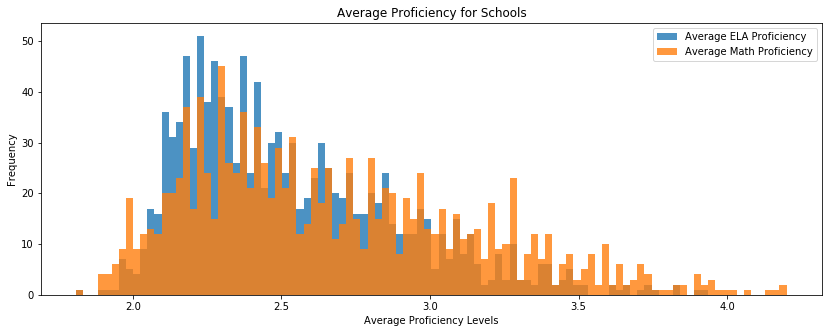

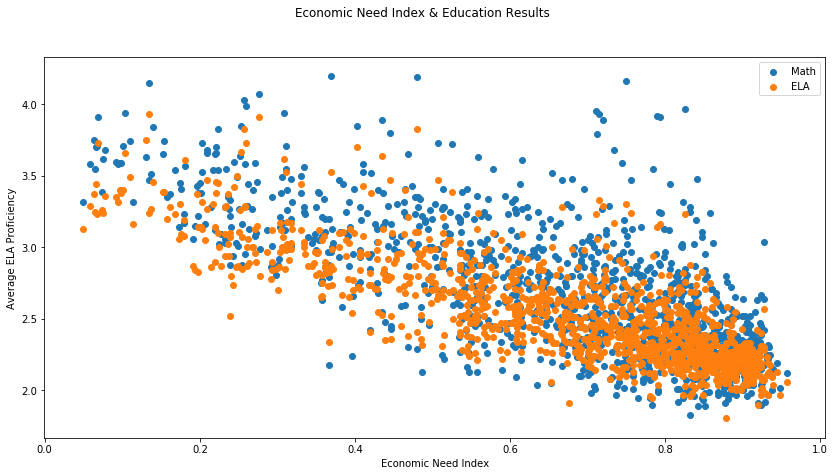

In [75]:
fig,ax = plt.subplots(1, figsize=(14,7))
school_explorer[['Average ELA Proficiency','Average Math Proficiency']]\
.plot.hist(bins=100,alpha=0.8,figsize=(14,5),ax=ax,
           title='Average Proficiency for Schools')
ax.set_xlabel('Average Proficiency Levels')

fig,ax = plt.subplots(1, figsize=(14,7))
ax.scatter(school_explorer['Economic Need Index'],
           school_explorer['Average Math Proficiency'],
           label='Math')
ax.scatter(school_explorer['Economic Need Index'],
           school_explorer['Average ELA Proficiency'],
           label='ELA')
ax.set_xlabel('Economic Need Index')
ax.set_ylabel('Average ELA Proficiency')
ax.legend()
plt.suptitle('Economic Need Index & Education Results');

## &#x1F310; &nbsp; Findings-2

[PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables) is the second look at the main dataset 

- dividing the variables into numeric and categorical types and preprocess them.

For filling the missing values in the numeric case was used the interpolation method, in the categorical case - the most common values.

In [76]:
# Fillna or replace values
numeric_list = list(school_explorer\
.columns[[7,8]+list(range(16,27))+[28,30,32,34,36]+list(range(41,161))])
target_list = ['Average ELA Proficiency','Average Math Proficiency']

school_explorer = school_explorer.drop(['Adjusted Grade',
                                        'New?',
                                        'Other Location Code in LCGMS'], 
                                       axis=1)
school_explorer.loc[[427,1023,712,908],'School Name'] = \
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']

percent_list = ['Percent ELL','Percent Asian','Percent Black',
                'Percent Hispanic','Percent Black / Hispanic',
                'Percent White','Student Attendance Rate',
                'Percent of Students Chronically Absent',
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']

for el in percent_list:
    school_explorer[el] = school_explorer[el].astype('str')
    school_explorer[el] = school_explorer[el].str.replace("%", "")
    school_explorer[el] = school_explorer[el].str.replace("nan", "0")
    school_explorer[el] = school_explorer[el].astype(float)
    school_explorer[el].replace(0, np.NaN, inplace=True)
    school_explorer[el] = school_explorer[el].interpolate()
    
school_explorer['Economic Need Index'] = \
school_explorer['Economic Need Index'].interpolate()
school_explorer['Average ELA Proficiency'] = \
school_explorer['Average ELA Proficiency'].interpolate()
school_explorer['Average Math Proficiency'] = \
school_explorer['Average Math Proficiency'].interpolate()

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype('str') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate'] = \
    school_explorer['School Income Estimate'].str.replace(s, "")
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].str.replace("nan", "0")

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0, np.NaN, inplace=True)
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].interpolate()

rating_list = ['Rigorous Instruction Rating','Collaborative Teachers Rating',
               'Supportive Environment Rating','Effective School Leadership Rating',
               'Strong Family-Community Ties Rating','Strong Family-Community Ties Rating',
               'Trust Rating','Student Achievement Rating']

for el in rating_list:
    moda_value = school_explorer[el].value_counts().idxmax()
    school_explorer[el] = school_explorer[el].fillna(moda_value) 
    
category_list1 = ['District','Community School?','City','Grades']
                  
category_list2 = ['Rigorous Instruction Rating',
                  'Collaborative Teachers Rating',
                  'Supportive Environment Rating',
                  'Effective School Leadership Rating',
                  'Strong Family-Community Ties Rating',
                  'Trust Rating','Student Achievement Rating']

for feature in category_list1:
    feature_cat = pd.factorize(school_explorer[feature])
    school_explorer[feature] = feature_cat[0]
    
for feature in category_list2:
    feature_pairs = dict(zip(['Not Meeting Target', 'Meeting Target', 
                              'Approaching Target', 'Exceeding Target'],
                             ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature] = school_explorer[feature].astype(int)
    
category_list = list(category_list1+category_list2)
    
print('NaN count = ', sum(school_explorer.isna().sum()))

NaN count =  0


The correlation of variables with educational results also was discovered and represented. 

It cannot be proved that levels of `Economic Need Index` and `Percent Black / Hispanic` are causes of the level of `Average Math Proficiency` and `Average ELA Proficiency`, but they are correlated with educational results too strongly.

In [121]:
corr_matrix = school_explorer[numeric_list+target_list].corr(method='pearson')
corr_math = corr_matrix.iloc[-1][:-1]
corr_math30 = corr_math[abs(corr_math).argsort()[::-1]][:30]
corr_math30.to_frame().style.bar(align='mid',color=['#1f77b4','#ff7f0e'])\
.set_properties(**{'opacity':'0.9','font-family':'Roboto','color':'black'})

,Average Math Proficiency
Average ELA Proficiency,0.935253
Percent Black / Hispanic,-0.718155
Economic Need Index,-0.704222
Student Attendance Rate,0.679338
Grade 5 Math 4s - All Students,0.625105
Grade 3 Math 4s - All Students,0.623729
Grade 4 Math 4s - All Students,0.617929
Grade 5 ELA 4s - All Students,0.608659
Grade 4 ELA 4s - All Students,0.599617
Grade 3 ELA 4s - All Students,0.576874


In [122]:
corr_ela = corr_matrix.iloc[-2][corr_matrix.columns != 'Average ELA Proficiency']
corr_ela30 = corr_ela[abs(corr_ela).argsort()[::-1]][:30]
corr_ela30.to_frame().style.bar(align='mid',color=['#1f77b4','#ff7f0e'])\
.set_properties(**{'opacity':'0.9','font-family':'Roboto','color':'black'})

,Average ELA Proficiency
Average Math Proficiency,0.935253
Economic Need Index,-0.794865
Percent Black / Hispanic,-0.732782
Student Attendance Rate,0.637642
Percent White,0.631241
School Income Estimate,0.601464
Grade 5 ELA 4s - All Students,0.574409
Grade 4 ELA 4s - All Students,0.542865
Grade 5 Math 4s - All Students,0.540469
Grade 3 ELA 4s - All Students,0.534498


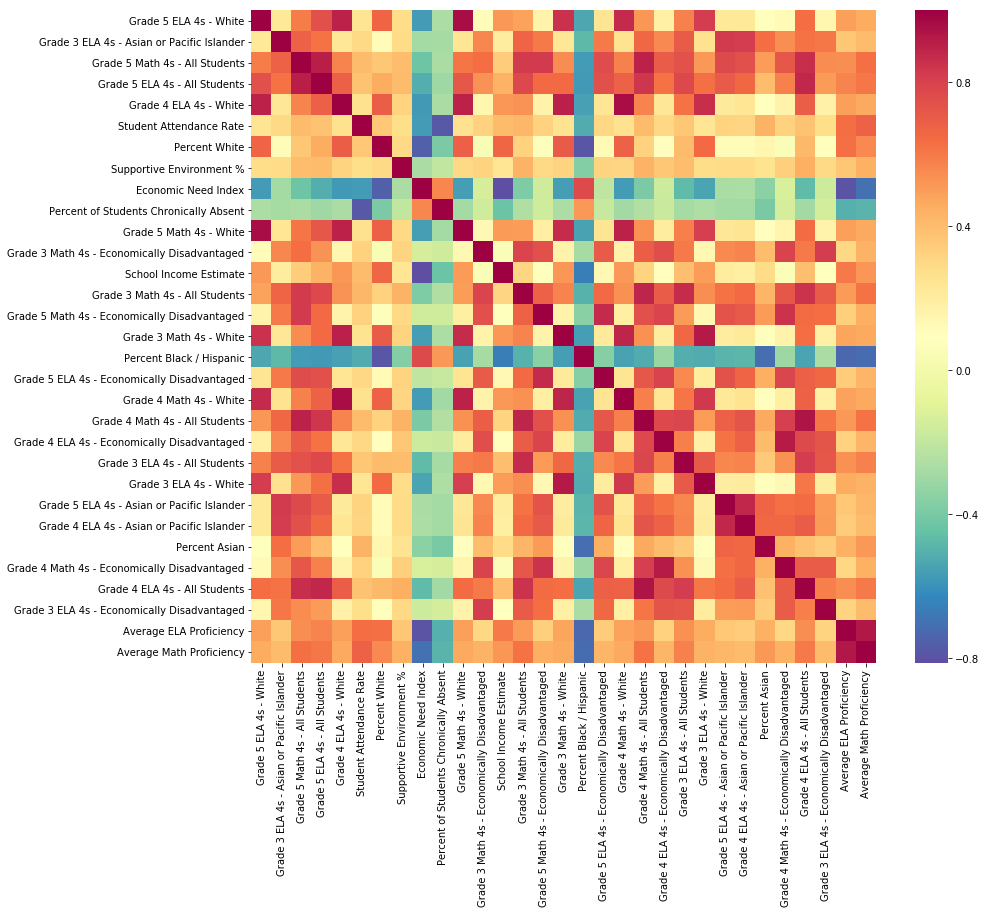

In [120]:
fig,ax = plt.subplots(1, figsize=(14,12))
corr_id = list(set(corr_math30.index).intersection(set(corr_ela.index))) + target_list
sns.heatmap(corr_matrix.loc[corr_id,corr_id], 
            ax=ax,cmap='Spectral_r');